In [9]:
import probRobScene
import numpy as np

The goal of this project is going to be to generate beautiful images of a simulated scene given a "ProbRobScene" file. 
Currently we can generate matplotlib images that basically just have each object be represented as a block, but the images are only really meant for debugging. What we want is to produce images that we could put in front of an average person and they would see the simulation from a reasonable angle with objects represented as real objects. 

In [16]:

def generate_images(scenario_file, max_generations=9):
    scenario = probRobScene.scenario_from_file(scenario_file)

    rejections_per_scene = []
    for i in range(max_generations):
        # print(f"Generation {i}")
        ex_world, used_its = scenario.generate(verbosity=2)
        rejections_per_scene.append(used_its)
        ex_world.show_3d(save_location=f"test{i}.png")

    avg_rejections = np.average(rejections_per_scene)



In [18]:
cat forMae/cupPour.prs

from model import *

table_1 = Table on Vector3D(0,0,0), with width 1.8, with length 0.8, with height 0.8, with color "0.9"
r = Robot on (top back table_1).position - Vector3D(0.4, 0, 0), with color "0.5"

cup_1 = Cup completely on table_1, with color "0.12"
cup_2 = Cup completely on table_1, aligned with cup_1 by "y", with color "0.12"
cup_3 = Cup completely on table_1, aligned with cup_2 by "y", with color "0.12"

table_2 = Table on Vector3D(0.2, 0.75, 0.0), with width 0.7, with length 0.65, with height 0.56, with color "0.9"
bowl = Bowl completely on table_2

camera = Camera at Vector3D(table_1.x + (-0.1, 0.1), table_1.y + (-0.1, 0.1), (1.9, 2.1)), facing Vector3D(0, 0, -1)



  Rejected sample 0 because of: object intersection
  Rejected sample 1 because of: object intersection


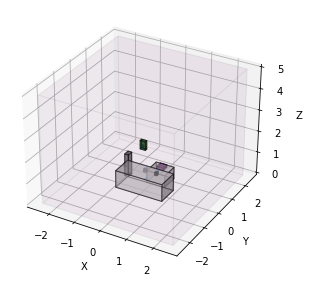

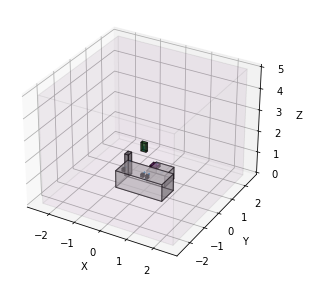

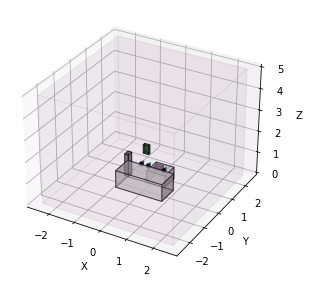

In [21]:
generate_images('forMae/cupPour.prs', 3)

In [19]:
cat forMae/swingingBucket.prs

from model import *

table = Table on Vector3D(0,0,0), with width 1.8, with length 0.8, with height 0.8, with color "0.9"
r = Robot on (top back table).position - Vector3D(0.4, 0, 0), with color "0.5"

tray = Tray completely on table, ahead of r by 0.1, left of (top table) by 0.2

cube_1 = Cube completely on tray
cube_2 = Cube on cube_1
cube_3 = Cube on cube_2

bucket = RopeBucket on Vector3D(r.x, r.y+0.6, r.z - 0.3)

camera = Camera at Vector3D(table.x + (-0.1, 0.1), table.y + (-0.1, 0.1), (1.9, 2.1)), facing Vector3D(0, 0, -1)


/Users/mattiasappelgren/Desktop/ProbRobScene/src/probRobScene/core/vectors.py:426: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  return Vector3D(*rot_vec.as_euler('zyx'))


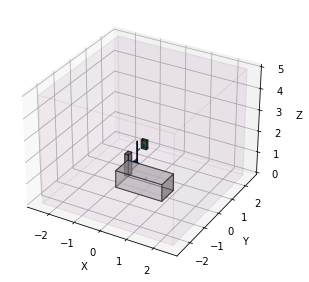

In [20]:
generate_images('forMae/swingingBucket.prs', 1)

Option 1: Use probrobscene as the language for specifying simulations. Currently it has CopeliaSim connected to it so you should be able to create a CopeliaSim simulation and the question would be if you can take pictures from inside of that simulation. An even better outcome would be to also be able to somehow interact with the simulated scene, e.g. click at particular objects to "point" at them. If we could get that going and maybe embedded in a webpage or something then it would be amazing. 

The other option is to try use a different simulator, e.g. mujoco to do essentially the same task. I don't have a strong preference for which one it is. 

https://github.com/craigiedon/ProbRobScene

https://www.coppeliarobotics.com
https://mujoco.org

Option 2: Use scenic, the language ProbRobScene was based on to do this. Scenic is quickly moving forwards and doing cool stuff. I haven't really looked properly at it, but I would find it really helpful to know what capabilities Scenic have and I think it supports more complicated constraints and relationships between objects as well as different simulators and environments. I think the first job should probably be to investigate scenic and see what it can do, how easy it is to use and what kind of constraints it can impose. 
https://scenic-lang.readthedocs.io/en/latest/

https://github.com/BerkeleyLearnVerify/Scenic